In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("서인천IC-부평IC 평균속도.csv", encoding='CP949')
df = df.drop(df.columns[0], axis=1)

df.columns = ["ds","y"]
df["ds"] = df["ds"].astype(str)
df["ds"] = pd.to_datetime(df["ds"].str.slice(start=0, stop=4) + "/" + df["ds"].str.slice(start=4, stop=6) + "/" +df["ds"].str.slice(start=6, stop=8) + "/" + df["ds"].str.slice(start=8, stop=10) + ":0")
df.head()

,ds,y
0,2021-05-01 00:00:00,98.63
1,2021-05-01 01:00:00,100.53
2,2021-05-01 02:00:00,99.86
3,2021-05-01 03:00:00,99.34
4,2021-05-01 04:00:00,93.64


In [5]:
m = Prophet()
m.fit(df[:-24*7])


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(freq='H',periods=24*7)
future.tail()

,ds
739,2021-05-31 19:00:00
740,2021-05-31 20:00:00
741,2021-05-31 21:00:00
742,2021-05-31 22:00:00
743,2021-05-31 23:00:00


In [6]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("서인천IC-부평IC 평균속도.csv", encoding='CP949')
df = df.drop(df.columns[0], axis=1)

df.columns = ["ds","y"]
df["ds"] = df["ds"].astype(str)
df["ds"] = pd.to_datetime(df["ds"].str.slice(start=0, stop=4) + "/" + df["ds"].str.slice(start=4, stop=6) + "/" +df["ds"].str.slice(start=6, stop=8) + "/" + df["ds"].str.slice(start=8, stop=10) + ":0")
df

,ds,y
0,2021-05-01 00:00:00,98.63
1,2021-05-01 01:00:00,100.53
2,2021-05-01 02:00:00,99.86
3,2021-05-01 03:00:00,99.34
4,2021-05-01 04:00:00,93.64
...,...,...
739,2021-05-31 19:00:00,58.86
740,2021-05-31 20:00:00,79.86
741,2021-05-31 21:00:00,86.01
742,2021-05-31 22:00:00,92.28


In [8]:
m = Prophet()
m.fit(df[:-24*7])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [9]:
future = m.make_future_dataframe(freq='H',periods=24*7)
future.tail()

,ds
739,2021-05-31 19:00:00
740,2021-05-31 20:00:00
741,2021-05-31 21:00:00
742,2021-05-31 22:00:00
743,2021-05-31 23:00:00


In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail()


,ds,yhat
739,2021-05-31 19:00:00,69.159387
740,2021-05-31 20:00:00,75.501921
741,2021-05-31 21:00:00,83.056167
742,2021-05-31 22:00:00,89.974651
743,2021-05-31 23:00:00,94.653136


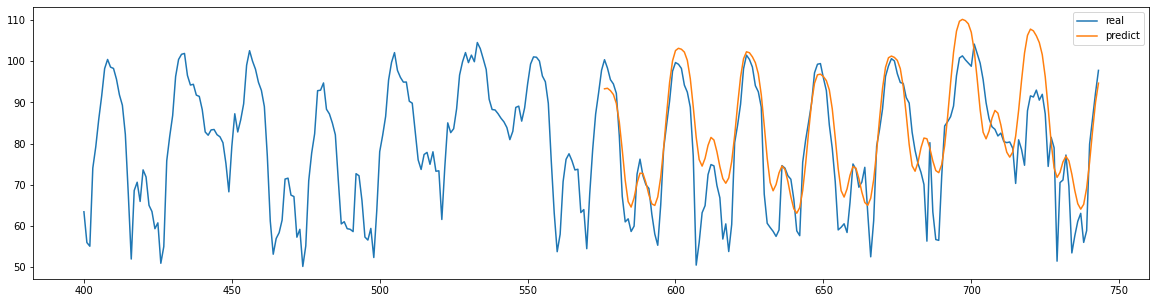

In [11]:
plt.figure(figsize=(20,5))

plt.plot(df["y"][400:], label="real")
plt.plot(range(744-24*7,744),forecast['yhat'][-24*7:], label="predict")
plt.legend()
plt.show()

In [12]:
def MAPEval(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPEval(forecast['yhat'][744-24*7:],df["y"][744-24*7:])

9.854380158591118